# Setup

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 1

import numpy as np

import matplotlib
matplotlib.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

%aimport w7x_bes_tools

# Port viewing geometry and field alignment

Assess ports for beam views with field alignment and sufficient Doppler shift

In [2]:
from w7x_bes_tools import beams
print('Beams')
sources = {}
for i in [5,6,7,8]:
    sources[i] = beams.HeatingBeam(source=i, eq_tag='w7x_ref_29')
    print(f'  {sources[i].description}')
print('Ports')
for port_name, port_location in sources[5].ports.items():
    print(f'  {port_name:9}: {port_location} m')

Beams
  Src 5 with H injection at 60.0 keV (v_full = 3.39e+06 m/s)
  Src 6 with H injection at 60.0 keV (v_full = 3.39e+06 m/s)
  Src 7 with H injection at 60.0 keV (v_full = 3.39e+06 m/s)
  Src 8 with H injection at 60.0 keV (v_full = 3.39e+06 m/s)
Ports
  A21-mid  : [1.9818 6.0994 0.    ] m
  A21-hi   : [1.9818 6.0994 0.25  ] m
  A21-hihi : [1.9818 6.0994 0.375 ] m
  B20      : [2.1135 5.8323 0.9061] m
  F20      : [2.8369 5.7346 0.4493] m
  Q21      : [1.7032 6.1272 0.6504] m
  T20      : [4.4571 4.5483 0.1599] m
  Y20      : [3.3521 5.3668 0.7367] m
  W21      : [-1.7043  5.776  -0.3467] m
  V30      : [-1.8182  4.6717  0.6411] m
  W30      : [-2.0161  5.6747  0.3462] m
  U30      : [-1.9393  5.9687  0.    ] m


## Beam axis field alignment and Doppler shift
All calculations are H injection at 60 keV and high mirror configuration (VMEC 'w7x_ref_29') unless otherwise noted.
Analysis performed on sources 5-8.  Sources 1-4 give results identical to sources 5-8, respectively.
Sources 5, 6 are not operational for OP2, and sources 7, 8 will be operational for OP2.

Saving plots/S5_w7x_ref_29_onaxis.pdf
Saving plots/S6_w7x_ref_29_onaxis.pdf
Saving plots/S7_w7x_ref_29_onaxis.pdf
Saving plots/S8_w7x_ref_29_onaxis.pdf


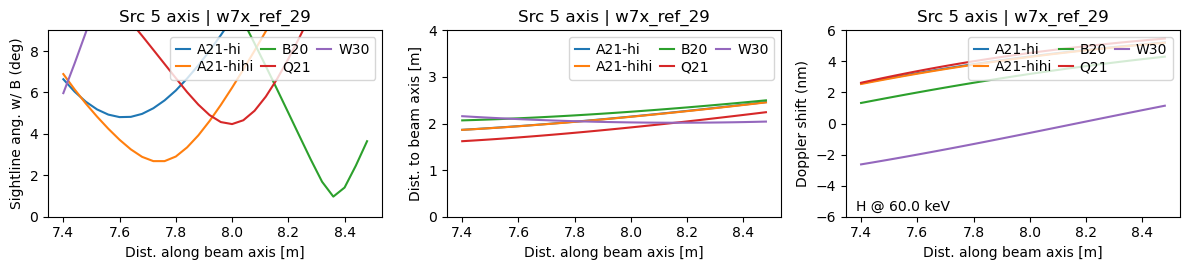

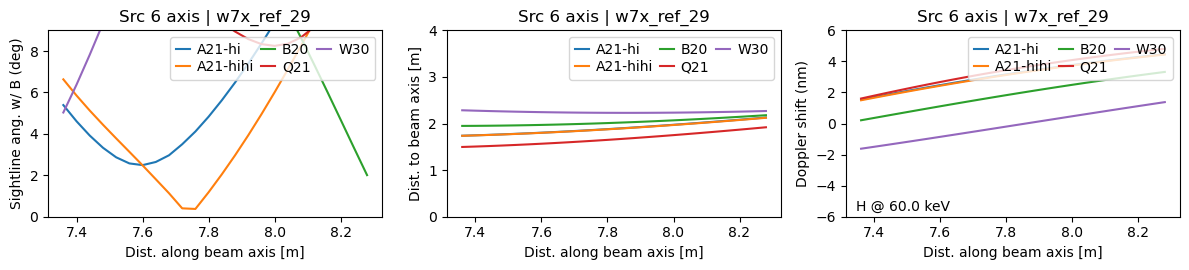

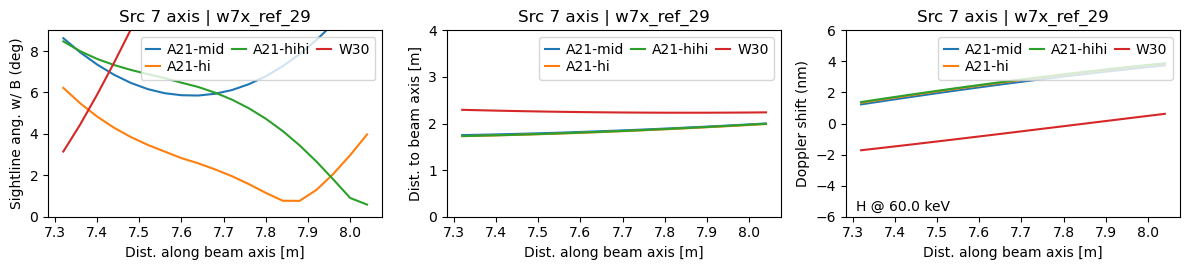

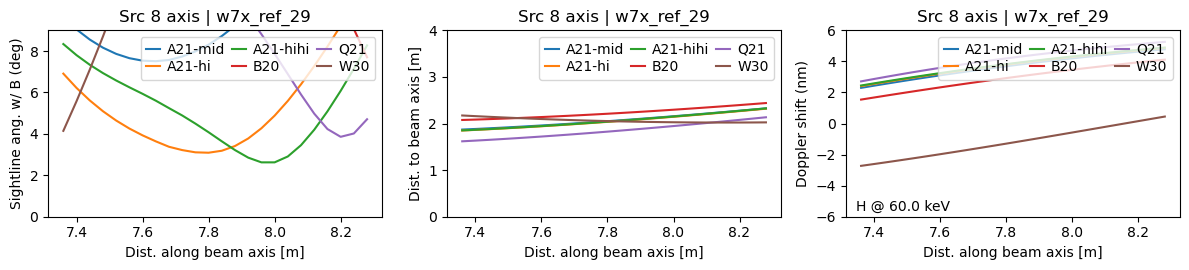

In [3]:
for source in sources.values():
    source.plot_beam_axis(save=True)

## Beam plane field alignment and Doppler shift
Beam contours (grey) are 70%/80%/90% intensity contours with 1 deg. divergence (no attenuation from beam deposition)

Avg full-energy perp. velocity = 3.09e+06 m/s
SL/beam off-normal angle = 22.54 deg
Excited state lifetime travel (vacuum) = 3.09 cm
Saving plots/S6_A21-hihi_w7x_ref_29_vplane.pdf
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Saving plots/S7_W30_w7x_ref_29_vplane.pdf


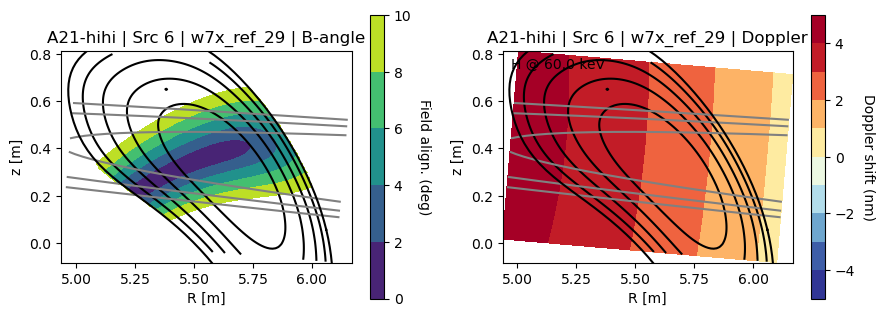

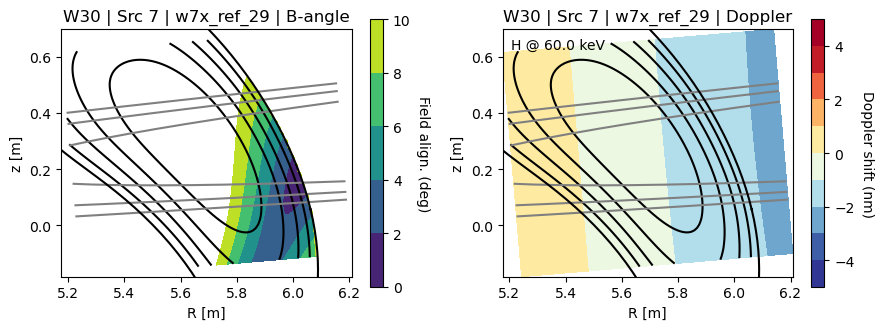

In [4]:
sources[6].plot_beam_plane(port='A21-hihi', eq_tag='w7x_ref_29', save=True)
sources[7].plot_beam_plane(port='W30', eq_tag='w7x_ref_29', save=True)

# Beam emission

Assess beam emission to get emission radiance values at approximate measurement locations

## Emission spectrum

Using Numba
Numpy table interpolation imported.
FIDASIM results: data/FIDASIM/W30_P7
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/spec.hdf5
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/grid3d.hdf5
Saving plots/W30_P7_R580_Z22.pdf


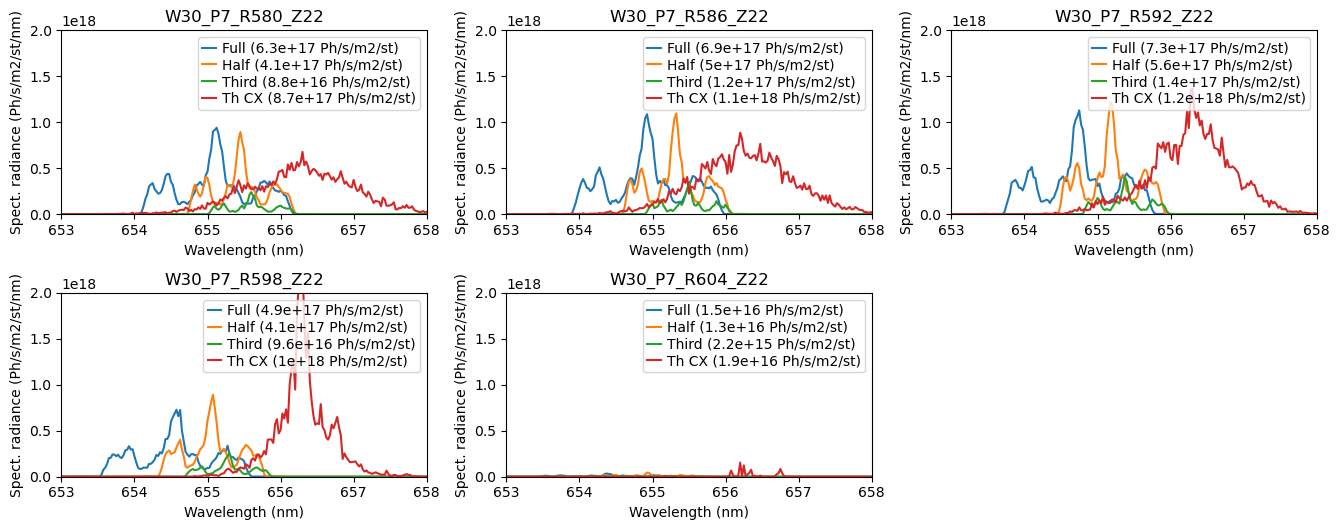

In [5]:
from w7x_bes_tools.fida import Fida
f = Fida(simdir='W30_P7')
ilos = f.los_filter(tag='Z22')
f.plot_spectra(ilos=ilos[::3], save=True)

## Beam radiance

Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Saving plots/fida_beam.pdf
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Saving plots/fida_beam_zoom.pdf


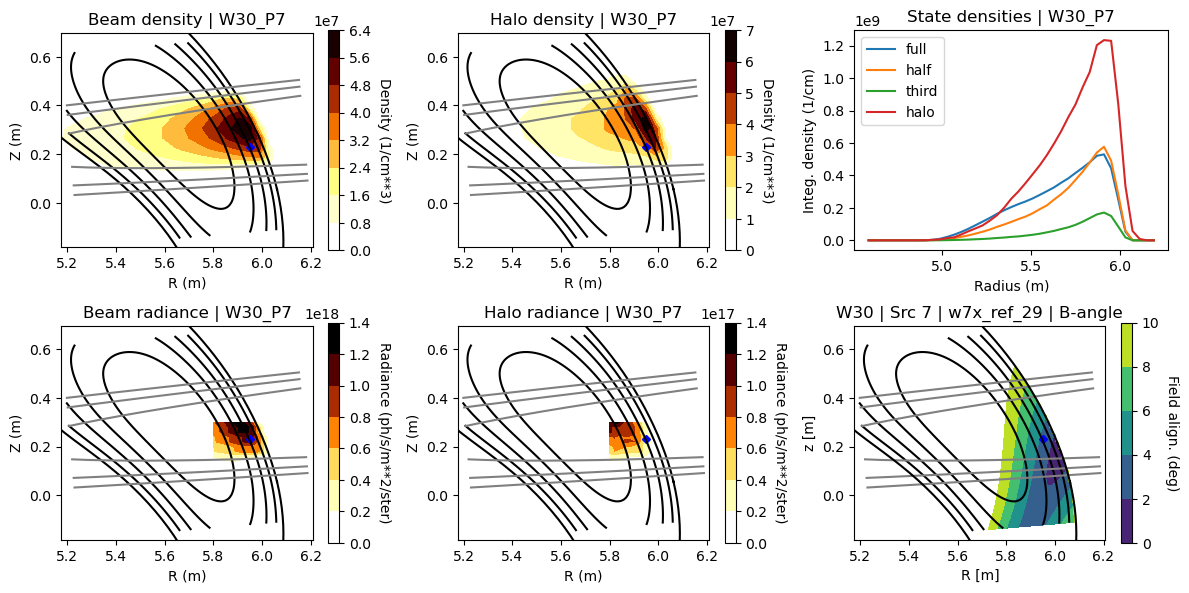

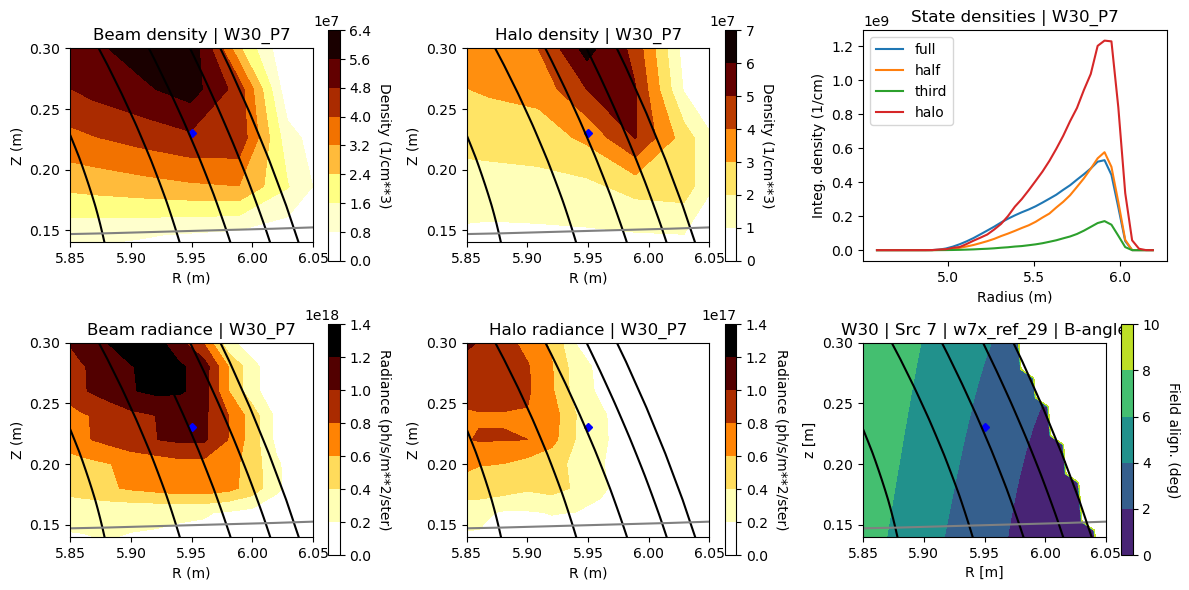

In [6]:
passband = [653,655.3]
marker = [595, 23]
f.plot_beam_plane(passband=passband, marker=marker, save=True)
f.plot_beam_plane(passband=passband, marker=marker, save=True, zoom=True)

## Radial profiles

Saving plots/fida_array_W30_P7_R580_Z18.pdf
Saving plots/fida_array_W30_P7_R580_Z22.pdf
Saving plots/fida_array_W30_P7_R580_Z26.pdf


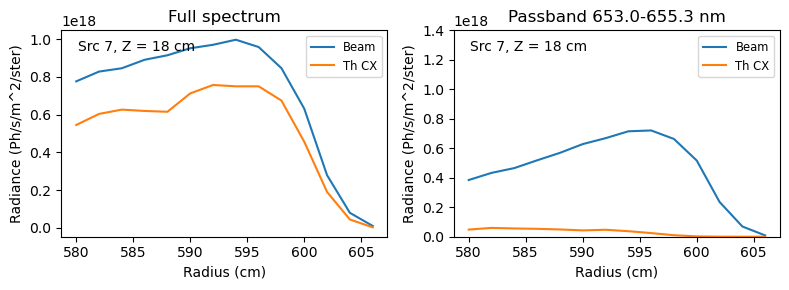

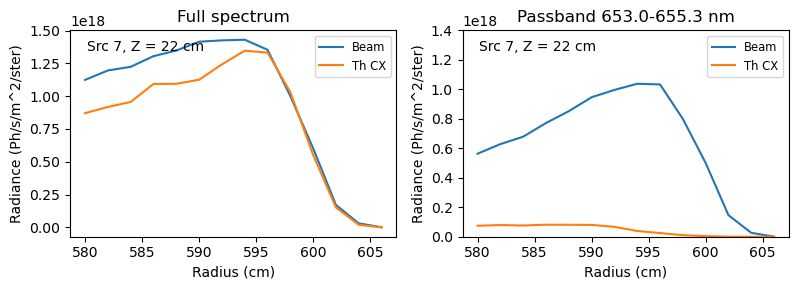

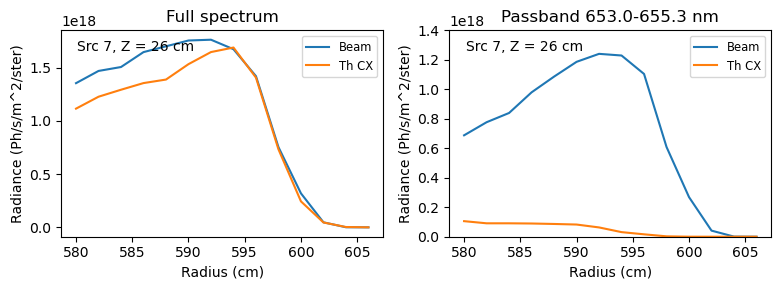

In [7]:
f.plot_radial_array(z=18, passband=passband, save=True)
f.plot_radial_array(z=22, passband=passband, save=True)
f.plot_radial_array(z=26, passband=passband, save=True)

# Optical throughput and signal estimation

Assess optical throughput, radiant flux, and signal/noise/SNR for beam radiance

Emitter specifications
  Port-beam distance: 230.0 cm
  Aperture diameter: 8.0 cm
  Numerical aperture: 0.0174
Diode specificaitons
  Operation temp: -20.0 C
  Reference temp: 20.0 C
  Reference dark current: 0.010 nA
  Responsivity: 0.47 A/W
  Bandwidth: 1.0 MHz
  Feedback resistor: 100.0 MOhm
Saving plots/emitter_etendue.pdf
  Dark current @ T_op: 0.0006 nA
  Feedback resistor thermal noise: 0.012 nA
Saving plots/diode_response.pdf
(dI/I)/(dn/n) = 0.75 for ne=1e+19 #/m**3
Saving plots/min_detect_fluctuation_f75.pdf
(dI/I)/(dn/n) = 0.55 for ne=8e+19 #/m**3
Saving plots/min_detect_fluctuation_f55.pdf


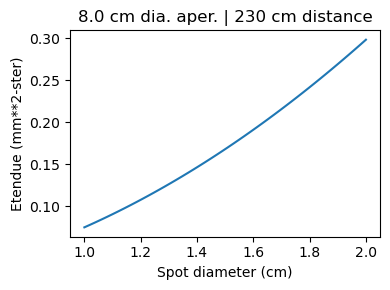

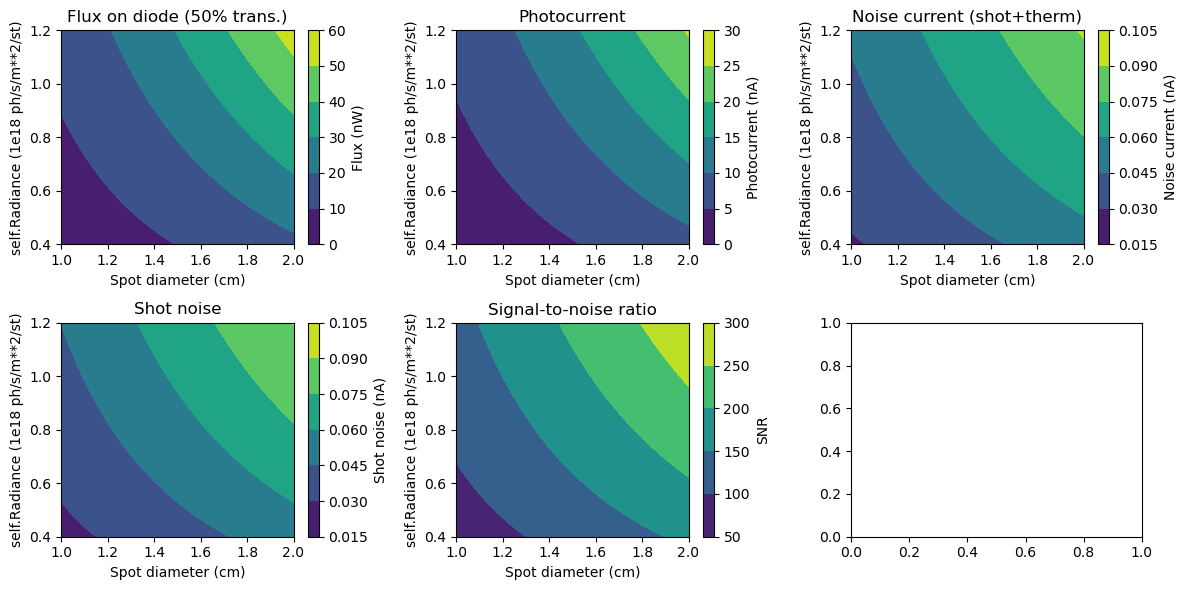

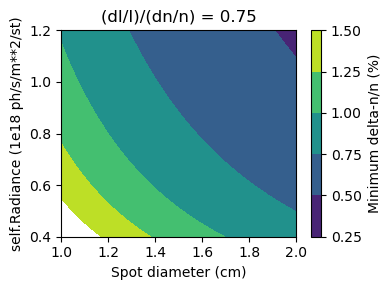

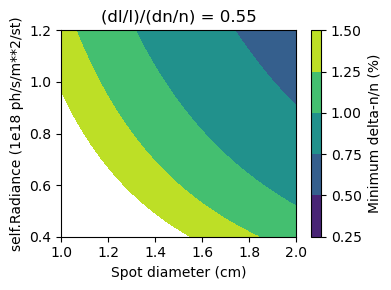

In [8]:
from w7x_bes_tools import signals

diode = signals.Diode()

diode.emitter.plot_etendue(save=True)
diode.plot_diode_response(save=True)

ne, di_dn_factor = 1e19, 0.75
print(f'(dI/I)/(dn/n) = {di_dn_factor:.2f} for ne={ne:.1g} #/m**3')
diode.plot_min_detect_fluctuation(di_dn_factor=di_dn_factor, save=True)

ne, di_dn_factor = 8e19, 0.55
print(f'(dI/I)/(dn/n) = {di_dn_factor:.2f} for ne={ne:.1g} #/m**3')
diode.plot_min_detect_fluctuation(di_dn_factor=di_dn_factor, save=True)

# Spatial localization, 2D configuration, and k-space sensitivity

Assess sightline spatial localization, 2D configuration, and k-space sensitivity

## Profiles and max $k_\perp\rho_i$

### Post-pellet regime

consider installing grequests for python for parallel async download!
Available profile data in data/profile_data_180904027.pickle
Saving profile data in data/profile_data_180904027.pickle
Doing ne fits
Doing te fits
Doing ti fits
Using atomic mass = 1 AMU for rho-i
C2C = 1.00 cm  -> kmax = 3.14 1/cm
  max(k*rhoi) = 0.79 at r/a = 0.55
  max(k*rhoi) = 0.56 at r/a = 0.75
  max(k*rhoi) = 0.19 at r/a = 0.95
C2C = 1.40 cm  -> kmax = 2.24 1/cm
  max(k*rhoi) = 0.57 at r/a = 0.55
  max(k*rhoi) = 0.40 at r/a = 0.75
  max(k*rhoi) = 0.13 at r/a = 0.95
Saving plots/k-omega_180904027_1900ms.pdf


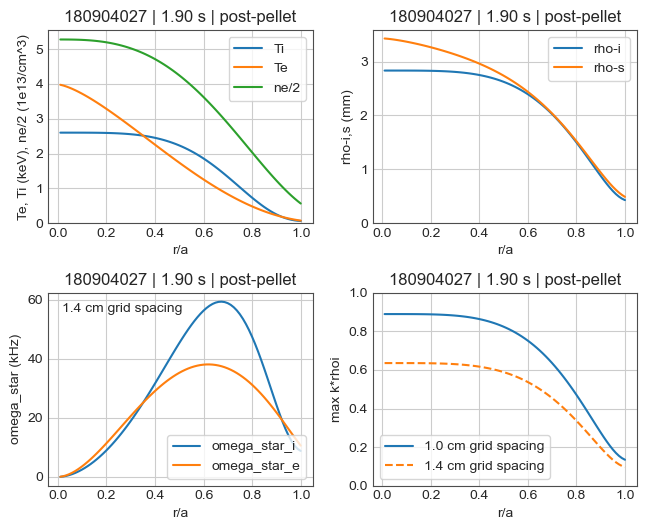

In [9]:
from w7x_bes_tools import profiles
pro = profiles.Profiles(iprofile=0)
pro.plot_profiles2(save=True)

### NBI heating regime

Available profile data in data/profile_data_180919007.pickle
Saving profile data in data/profile_data_180919007.pickle
Doing ne fits
Doing te fits
Doing ti fits
Using atomic mass = 1 AMU for rho-i
C2C = 1.00 cm  -> kmax = 3.14 1/cm
  max(k*rhoi) = 0.64 at r/a = 0.55
  max(k*rhoi) = 0.50 at r/a = 0.75
  max(k*rhoi) = 0.27 at r/a = 0.95
C2C = 1.40 cm  -> kmax = 2.24 1/cm
  max(k*rhoi) = 0.46 at r/a = 0.55
  max(k*rhoi) = 0.36 at r/a = 0.75
  max(k*rhoi) = 0.19 at r/a = 0.95
Saving plots/k-omega_180919007_2400ms.pdf


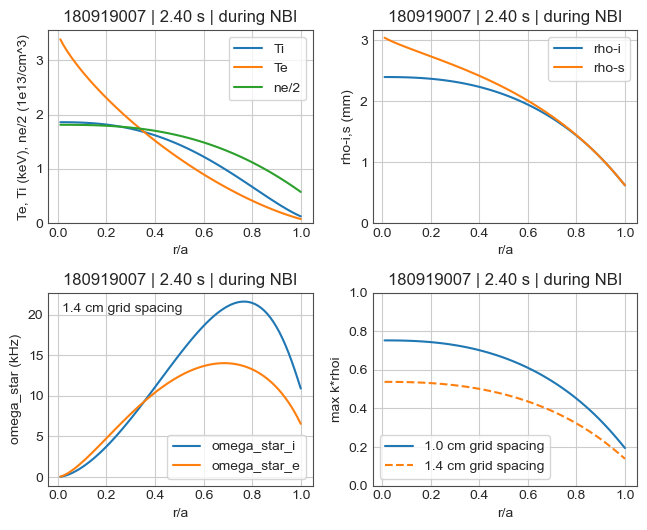

In [10]:
pro = profiles.Profiles(iprofile=1)
pro.plot_profiles2(save=True)

## Sightline grids and spatial coverage

Loaded data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle
Using saved sightline grid data
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Max rad/binorm excursion (cm): 2.55 1.70
Min/max psinorm: 0.36 0.96
Saving plots/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pdf


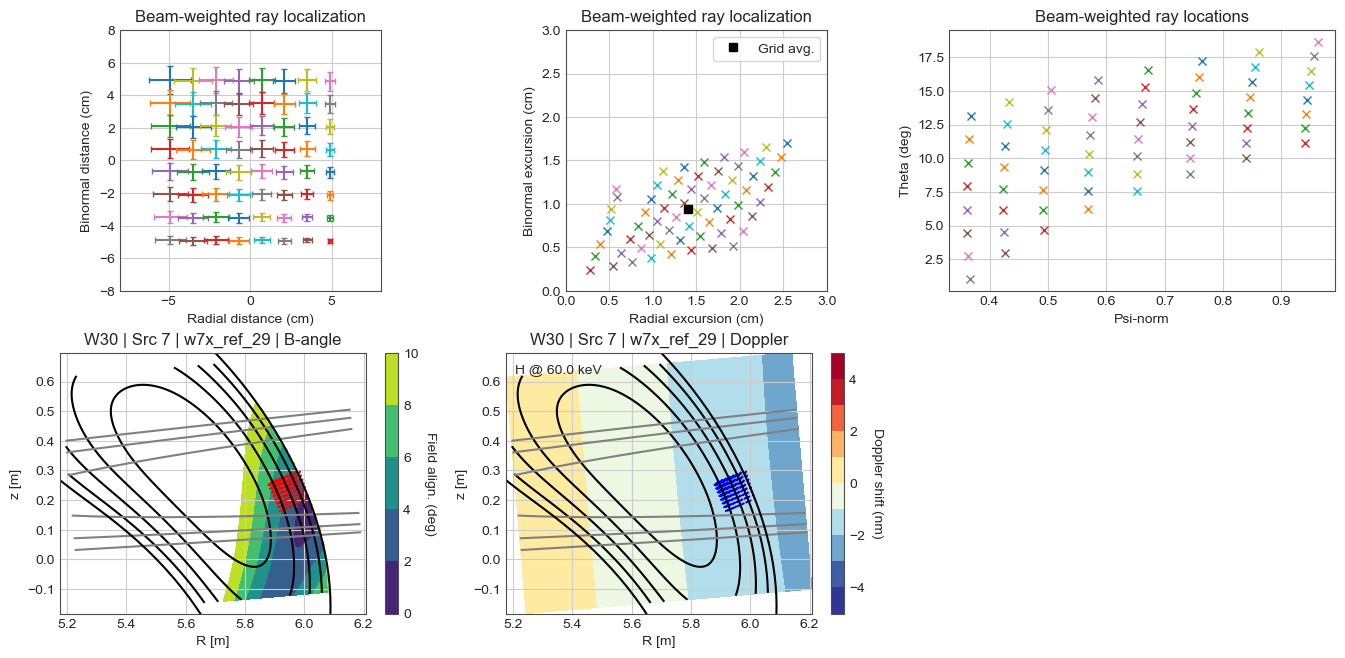

In [11]:
from w7x_bes_tools.sightline_grid import Grid
grid = Grid(beam=sources[7],
            port='W30',
            r_obs=5.95, 
            z_obs=0.23,
            c2c_normal=1.4,
            eq_tag='w7x_ref_29')
grid.plot(save=True)

FIDASIM results: data/FIDASIM/W30_P7
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/spec.hdf5
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/w7x-bes-design/analysis/dsmith/data/FIDASIM/W30_P7/grid3d.hdf5
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Using gridfile data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle
Loaded data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle
Using saved sightline grid data
Saving plots/fida_beam_grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pdf
Avg full-energy perp. velocity = 3.35e+06 m/s
SL/beam off-normal angle = 6.18 deg
Excited state lifetime travel (vacuum) = 3.35 cm
Using gridfile data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle
Loaded data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle
Using saved sightline grid data
Row, column, x (m), y (m), z (m)
0, 0, 0.249, 5.883, 0.256
0, 1, 0.250, 5.895, 

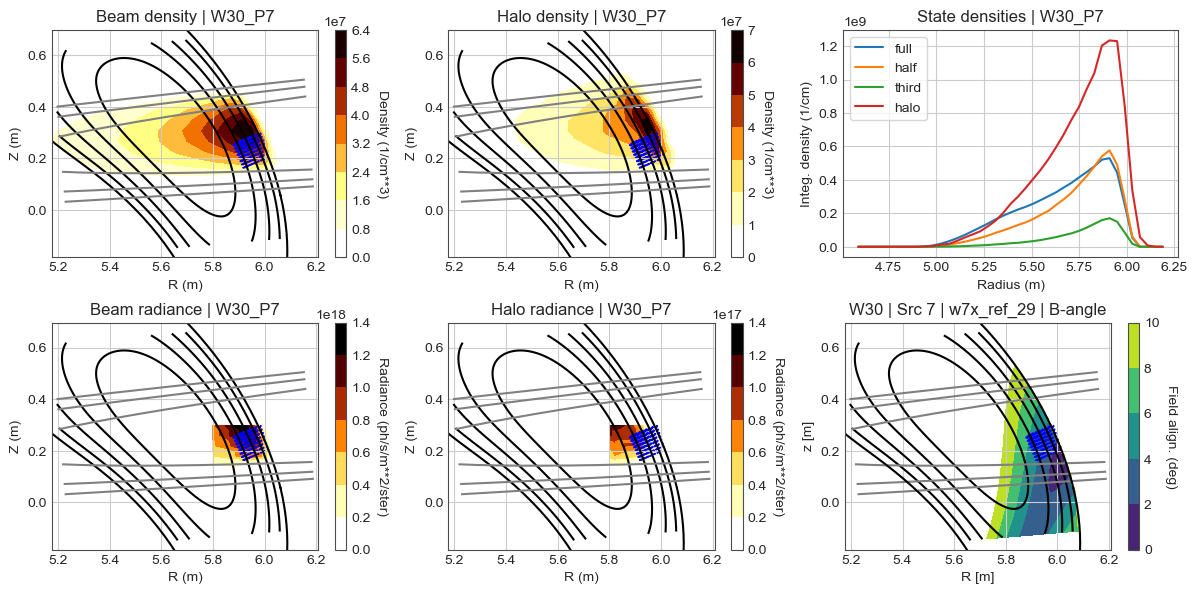

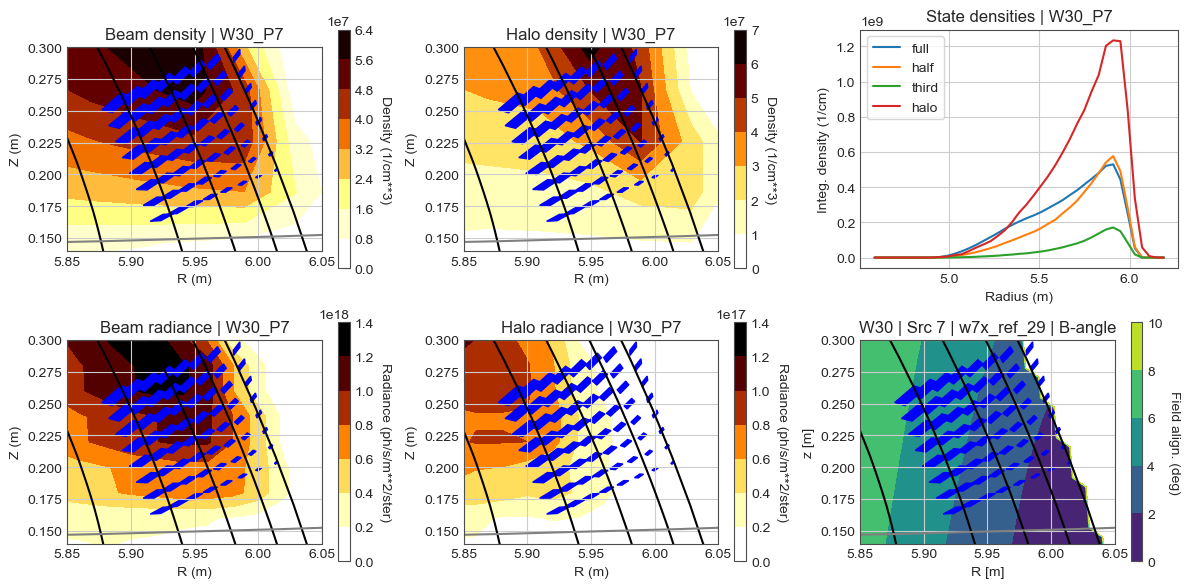

In [12]:
from w7x_bes_tools.fida import Fida
f = Fida(simdir='W30_P7')
f.plot_beam_plane(passband=passband, 
                  gridfile='data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle', 
                  save=True, 
                  zoom=False)
f.plot_beam_plane(passband=passband, 
                  gridfile='data/grid_88_c2c14_P7_W30_R595_Z23_w7x_ref_29.pickle', 
                  save=True, 
                  zoom=True,
                  print_xyz=True)

# Emission spectra

## Measured spectra

In [13]:
from IPython.display import Image
Image(filename='graphics/spectrum-1.png')

FileNotFoundError: [Errno 2] No such file or directory: 'graphics/spectrum-1.png'

In [ ]:
Image(filename='graphics/spectrum-2.png')

The aperture on source 7 clips the lower region of the beam where the **W30** field of view observes with optimal field alignment.  The W30 field of view must shift up about 6 cm to meet the source 7 beam density.  The shift degrades field alignment and increases the radial localizaiton from 1.5 cm to 2 cm.

# Optical throughput

In [ ]:
from w7x_bes_tools import optics
optics.plot(save=True, spot_distance=230, target_spotsize=1.4)

# Magnetic configurations

In [ ]:
from w7x_bes_tools import beams
from w7x_bes_tools.sightline_grid import Grid
eqs = {'standard':'w7x_ref_9',
       'low iota':'w7x_ref_20',
       'high iota':'w7x_ref_17'}
source = beams.HeatingBeam(source=7)
for key, eq_tag in eqs.items():
    print(key)
    source.plot_beam_plane(port='W30', eq_tag=eq_tag, save=True)

## Summary

Relative to **high mirror**, the **low iota** configuration gives slightly better field alignment, and the **high iota** configuration gives slightly worse field alignment.

# Conclusions


Two diagnostic configurations emerged as good condidates for fluctuation BES measurements

- W30 viewing source 7 (or W11 viewing source 3)
  - Blue shift view with good outer radius coverage, r/a ~ 0.6-1
  - Longer distance from port to beam, 2.3 m
  - Good field alignment allows small spot size and small channel-to-channel spacing, ~ 1 cm
  - **The aperture on source 7 clips the lower region of the beamwith optimal field alignment.  The W30 field of view must shift up about 6 cm to meet the source 7 beam density.  The shift degrades field alignment and increases the radial localizaiton from 1.5 cm to 2 cm.**
  - Lower emission flux to diode, ~ 3-10 nW (with 8 cm aperture diameter)
- A21-high viewing source 6 (or A21-low viewing source 2)
  - **Sources 2/6 will not be available for OP2**
  - **A21 is fully occupied**
  - Red shift with good mid-radius coverage, r/a ~ 0.4-0.8
  - Shorter distance from port to beam, 1.8 m
  - Slight misalignment with field limits spot size and channel-to-channel spacing to ~ 1.5 cm
  - Higher emission flux to diode, ~ 20-50 nW (with 8 cm aperture diameter)